# Exercices 2 - Speasy Manipulations

<div align="center">
<img src="https://raw.githubusercontent.com/SciQLop/speasy/main/logo/logo_speasy.svg"/>
</div>

# Installing and Importing Speasy

Installing Speasy is easy.
The following command will install the latest release packaged on pypi.

`!pip install --user speasy`

The next command allows to import and use speasy.
If it takes some time, it is normal as speasy builds the (long) lists of available data products across all data providers

In [ ]:
import speasy as spz

Before diving into the exercices, let's note that Speasy Documention is available here: https://speasy.readthedocs.io/en/latest/index.html <br/>

Hint: answers are probably in there somehow...

# First step

Speasy gives access to many data providers. The following cell grabs the `amda` data provider and uses the `get_data` function to get the magnetic field vector measured by MMS1 in survey mode in GSE coordinate system. <br/>

The goal of this exercice is to get the exact same dataset from the NASA CDA provider

In [ ]:
amda = spz.inventories.data_tree.amda
fgm_mms1_amda = spz.get_data(amda.Parameters.MMS.MMS1.FGM.mms1_fgm_srvy.mms1_b_gse, "2015-11-18 02:14",
                             "2015-11-18 03:34")

In [ ]:
# 
# 
# 
# write here the code to get the same dataset from the CDA provider
# ....
# ....

In [ ]:
# anwser
cda = spz.inventories.data_tree.cda
fgm_mms1_cda = spz.get_data(cda.MMS.MMS1.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gse_srvy_l2, "2015-11-18 02:14",
                            "2015-11-18 03:34")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [ ]:
fgm_mms1_cda.columns

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 5), sharex=True)
axes[0].plot(fgm_mms1_amda.time, fgm_mms1_amda.values, label=fgm_mms1_amda.columns)
axes[0].plot(fgm_mms1_amda.time, np.sqrt(np.sum(fgm_mms1_amda.values ** 2, axis=1)), label="B")
axes[0].set_title("AMDA")

axes[1].plot(fgm_mms1_cda.time, fgm_mms1_cda.values, label=fgm_mms1_cda.columns)
axes[1].set_title("CDA")

axes[2].plot(fgm_mms1_cda.time, (fgm_mms1_cda['Bx GSE', 'By GSE', 'Bz GSE'] - fgm_mms1_amda).values,
             label=("Bx", "By", "Bz"))
axes[2].set_title("Difference")

for ax in axes:
    ax.legend(ncol=4, loc="best")
fig.tight_layout()

# Spectrogram

The goal of this plot is to create the following figure.

(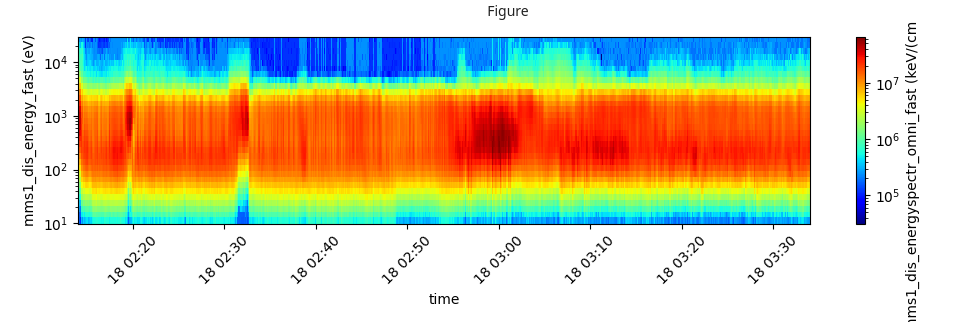)

Write in the next cell the code that will:
- get the omnidirectional energy flux spectrogram in Fast mode from MMS1, from the FPI instrument
- plot the spectrogram with the "jet" colormap



In [ ]:
# write here the code to get the omnidirectional energy flux in fast mode from MMS1 FPI instrument

In [ ]:
# answer
plt.figure(figsize=(10, 3))
product = cda.MMS.MMS1.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_energyspectr_omni_fast
mms1_omni = spz.get_data(product, "2015-11-18 02:14", "2015-11-18 03:34")
mms1_omni.plot(cmap="jet")
plt.tight_layout()

# Download several products at once

Let's say you have your favorite list of products and want to get them all.\
One option would be to call `get_data` as above, as many times as there are products in your list.<br/>
Here we will download in just **one call** of `get_data` the following products from MMS1 burst data on CDA:

- `mms1_dis_energyspectr_omni_brst`
- `mms1_dis_bulkv_gse_brst`
- `mms1_fgm_b_gse_brst_l2`

We will download data in the following MMS burst interval. Note we used strings to represent dates before, we can also use datetimes objects

In [ ]:
from datetime import datetime

start_time = datetime(2015, 11, 18, 2, 10)  #  "2015-11-18 02:10"
stop_time = datetime(2015, 11, 18, 2, 14)  # "2015-11-18 02:14"

In [ ]:
#
#
#
# here download in only 1 call of spz.get_data() the requested products, between start_time and stop_time
# datasets = spz.get_data(...)
#
#
#
#

The following cell should print the name of the downloaded products:

In [ ]:
for dataset in datasets:
    print(dataset.name)

In [ ]:

# ANSWER
# ------
mms1_prods = [cda.MMS.MMS1.DIS.MMS1_FPI_BRST_L2_DIS_MOMS.mms1_dis_energyspectr_omni_brst,
              cda.MMS.MMS1.DIS.MMS1_FPI_BRST_L2_DIS_MOMS.mms1_dis_bulkv_gse_brst,
              cda.MMS.MMS1.FGM.MMS1_FGM_BRST_L2.mms1_fgm_b_gse_brst_l2]

datasets = spz.get_data(mms1_prods, start_time, stop_time)

The following cell should plot the data

In [ ]:
from matplotlib.colors import LogNorm

fig, axes = plt.subplots(nrows=3, figsize=(10, 5), sharex=True)
spectro = datasets[0]
bulkVel = datasets[1]
magnetic = datasets[2]

axes[0].pcolormesh(spectro.time,
                   spectro.axes[1].values[0, :],
                   spectro.values.T, cmap="jet", norm=LogNorm())
axes[0].set_yscale("log")

axes[1].plot(bulkVel.time, bulkVel.values, label=bulkVel.columns)
axes[2].plot(magnetic.time, magnetic.values, label=magnetic.columns)

for ax in axes[1:]:
    ax.legend(ncol=4, loc="best")

fig.tight_layout()